<a href="https://colab.research.google.com/github/suciucos33/HACKATHON-TEAM-LASER-2021/blob/main/Try1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.7/dist-packages/scipy/integrate/odepack.py:245: ComplexWarning: Casting complex values to real discards the imaginary part
  int(bool(tfirst)))


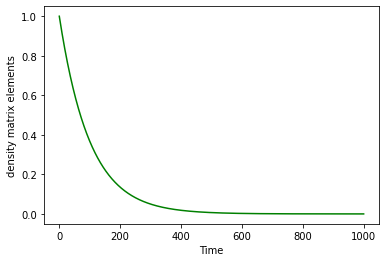

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.integrate import RK45

def tank(p,t):
   # constants
   #c1 = 0.13
   #c2 = 0.20
   #Ac = 2      # m^2
   # inflow
   #qin = 0.5   # m^3/hr
   # outflow
   #dp0 =  c_1*p[0]+ ..
   #
   #
   #
   #qout1 = c1 * h[0]**0.5
   #qout2 = c2 * h[1]**0.5
   # differential equations
   #dhdt1 = (qin   - qout1) / Ac
   #dhdt2 = (qout1 - qout2) / Ac
   # overflow conditions
   #if h[0]>=1 and dhdt1>=0:
   #    dhdt1 = 0
   #if h[1]>=1 and dhdt2>=0:
   #    dhdt2 = 0
   #dhdt = [dhdt1,dhdt2]

   gam = 0.01
   om = 0.01
   om_conj = np.conj(om)
   N_th = 0
   delta = 0

   p11 = p[0]
   p12 = p[1]
   p21 = p[2]
   p22 = p[3]
   dp22 = -gam*(N_th +1)*p22 +gam*N_th*p11 + 1j*om_conj*p21/2 - 1j*om*p12/2 
   dp11 = gam*(N_th +1)*p22 -gam*N_th*p11 - 1j*om_conj*p21/2 + 1j*om*p12/2
   dp12 = -gam*(2*N_th + 1)*p12/2 + 1j*delta*p12 - 1j*om_conj*(p22-p11)/2
   dp21 = -gam*(2*N_th + 1)*p21/2 - 1j*delta*p21 + 1j*om_conj*(p22-p11)/2

   dp = [dp11, dp12, dp21, dp22];
   return dp

# integrate the equations
t = np.linspace(0,1000,1000) # times to report solution
p0 = [0,0,0,1]            # initial conditions for height
y = odeint(tank,p0,t) # integrate

# plot results
plt.figure(1)
#plt.plot(t,y[:,0],'b-')
#plt.plot(t,y[:,1],'r-')
#plt.plot(t,y[:,2],'k-')
plt.plot(t,y[:,3],'g-')
plt.xlabel('Time')
plt.ylabel('density matrix elements')
#plt.legend(['p11','p12', 'p21', 'p22'])
plt.show()